<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [27]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [28]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [29]:
df_final_train.columns 

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [30]:
df_final_train.head() 

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,1.983696e-06,-1.545087e-13,8.108436e-13,1.719695e-14,1.355339e-12,-4.674880e-13,1.128509e-06,-6.616392e-14,9.770747e-13,4.159860e-14
1,21320,1134485,1,0,0.328125,0.059570,0.496321,56,83,77,...,6.870640e-12,-4.183212e-15,1.108862e-12,2.066131e-17,6.321709e-15,-4.328805e-09,9.603808e-12,-5.608049e-15,1.064669e-12,3.185358e-17
2,443939,535546,1,0,0.222222,0.166667,0.377964,1,6,4,...,5.979164e-16,-1.551551e-19,3.379619e-18,-4.746304e-22,8.948365e-14,-1.651029e-13,1.375166e-13,-1.034042e-15,3.234809e-14,4.307436e-18
3,691328,1565604,1,0,0.000000,0.000000,0.000000,2,2,3,...,7.392664e-14,-7.735542e-16,2.068885e-16,4.421066e-18,2.202369e-21,-3.890264e-22,-4.403406e-21,-6.562331e-23,1.165532e-21,1.579526e-21
4,319590,524894,1,0,0.000000,0.000000,0.000000,1,6,1,...,8.311638e-15,-7.743538e-12,2.253988e-14,1.782611e-14,9.218354e-15,-4.779483e-13,6.033918e-12,-4.141892e-11,2.317576e-13,6.060773e-14


# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

### Preferential Attachement

In [31]:

#for train dataset
nfs=np.array(df_final_train['num_followers_s'])
nfd=np.array(df_final_train['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followers']= preferential_followers
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,-1.545087e-13,8.108436e-13,1.719695e-14,1.355339e-12,-4.674880e-13,1.128509e-06,-6.616392e-14,9.770747e-13,4.159860e-14,66
1,21320,1134485,1,0,0.328125,0.059570,0.496321,56,83,77,...,-4.183212e-15,1.108862e-12,2.066131e-17,6.321709e-15,-4.328805e-09,9.603808e-12,-5.608049e-15,1.064669e-12,3.185358e-17,4648
2,443939,535546,1,0,0.222222,0.166667,0.377964,1,6,4,...,-1.551551e-19,3.379619e-18,-4.746304e-22,8.948365e-14,-1.651029e-13,1.375166e-13,-1.034042e-15,3.234809e-14,4.307436e-18,6
3,691328,1565604,1,0,0.000000,0.000000,0.000000,2,2,3,...,-7.735542e-16,2.068885e-16,4.421066e-18,2.202369e-21,-3.890264e-22,-4.403406e-21,-6.562331e-23,1.165532e-21,1.579526e-21,4
4,319590,524894,1,0,0.000000,0.000000,0.000000,1,6,1,...,-7.743538e-12,2.253988e-14,1.782611e-14,9.218354e-15,-4.779483e-13,6.033918e-12,-4.141892e-11,2.317576e-13,6.060773e-14,6


In [32]:

#for test dataset
nfs=np.array(df_final_test['num_followers_s'])
nfd=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followers']= preferential_followers
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,-2.701533e-12,4.341612e-13,5.535504e-14,9.994075e-10,-5.791921e-10,3.512351e-07,-2.486661e-09,2.771140e-09,1.727695e-12,84
1,783368,1420922,1,0,0.000000,0.000000,0.000000,1,0,0,...,-7.644914e-22,-1.078541e-21,-1.466792e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2,90444,855420,1,0,0.360000,0.115493,0.580948,17,21,10,...,-2.178154e-14,5.844160e-16,2.452365e-10,3.842855e-16,-1.446792e-15,2.317595e-15,-1.808249e-14,5.563771e-16,3.406961e-10,357
3,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,-3.541563e-16,1.088547e-15,4.403597e-18,9.043403e-17,-1.289445e-13,5.286651e-15,-4.560430e-18,1.730784e-17,6.111582e-20,9
4,452730,1122318,1,0,0.166667,0.333333,0.408248,1,3,1,...,-4.009987e-14,3.898567e-14,2.124664e-17,2.061081e-13,-6.863323e-13,1.711081e-13,-4.213340e-14,4.212921e-14,2.914608e-17,3


In [33]:
#for train dataset
nfs=np.array(df_final_train['num_followees_s'])
nfd=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followees']= preferential_followees
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,8.108436e-13,1.719695e-14,1.355339e-12,-4.674880e-13,1.128509e-06,-6.616392e-14,9.770747e-13,4.159860e-14,66,120
1,21320,1134485,1,0,0.328125,0.059570,0.496321,56,83,77,...,1.108862e-12,2.066131e-17,6.321709e-15,-4.328805e-09,9.603808e-12,-5.608049e-15,1.064669e-12,3.185358e-17,4648,7161
2,443939,535546,1,0,0.222222,0.166667,0.377964,1,6,4,...,3.379619e-18,-4.746304e-22,8.948365e-14,-1.651029e-13,1.375166e-13,-1.034042e-15,3.234809e-14,4.307436e-18,6,28
3,691328,1565604,1,0,0.000000,0.000000,0.000000,2,2,3,...,2.068885e-16,4.421066e-18,2.202369e-21,-3.890264e-22,-4.403406e-21,-6.562331e-23,1.165532e-21,1.579526e-21,4,3
4,319590,524894,1,0,0.000000,0.000000,0.000000,1,6,1,...,2.253988e-14,1.782611e-14,9.218354e-15,-4.779483e-13,6.033918e-12,-4.141892e-11,2.317576e-13,6.060773e-14,6,6


In [34]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,4.341612e-13,5.535504e-14,9.994075e-10,-5.791921e-10,3.512351e-07,-2.486661e-09,2.771140e-09,1.727695e-12,84,54
1,783368,1420922,1,0,0.000000,0.000000,0.000000,1,0,0,...,-1.078541e-21,-1.466792e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,90444,855420,1,0,0.360000,0.115493,0.580948,17,21,10,...,5.844160e-16,2.452365e-10,3.842855e-16,-1.446792e-15,2.317595e-15,-1.808249e-14,5.563771e-16,3.406961e-10,357,240
3,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,1.088547e-15,4.403597e-18,9.043403e-17,-1.289445e-13,5.286651e-15,-4.560430e-18,1.730784e-17,6.111582e-20,9,10
4,452730,1122318,1,0,0.166667,0.333333,0.408248,1,3,1,...,3.898567e-14,2.124664e-17,2.061081e-13,-6.863323e-13,1.711081e-13,-4.213340e-14,4.212921e-14,2.914608e-17,3,6


### SVD_dot

In [37]:
#for train datasets
s1,s2,s3,s4,s5,s6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']

In [38]:
svd_dot=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_train['svd_dot']=svd_dot

In [39]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees,svd_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,1.719695e-14,1.355339e-12,-4.674880e-13,1.128509e-06,-6.616392e-14,9.770747e-13,4.159860e-14,66,120,1.338774e-11
1,21320,1134485,1,0,0.328125,0.059570,0.496321,56,83,77,...,2.066131e-17,6.321709e-15,-4.328805e-09,9.603808e-12,-5.608049e-15,1.064669e-12,3.185358e-17,4648,7161,2.588616e-17
2,443939,535546,1,0,0.222222,0.166667,0.377964,1,6,4,...,-4.746304e-22,8.948365e-14,-1.651029e-13,1.375166e-13,-1.034042e-15,3.234809e-14,4.307436e-18,6,28,4.296940e-26
3,691328,1565604,1,0,0.000000,0.000000,0.000000,2,2,3,...,4.421066e-18,2.202369e-21,-3.890264e-22,-4.403406e-21,-6.562331e-23,1.165532e-21,1.579526e-21,4,3,-4.940893e-34
4,319590,524894,1,0,0.000000,0.000000,0.000000,1,6,1,...,1.782611e-14,9.218354e-15,-4.779483e-13,6.033918e-12,-4.141892e-11,2.317576e-13,6.060773e-14,6,6,3.207857e-22


In [40]:

#for test dataset
s1,s2,s3,s4,s5,s6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']

In [41]:
svd_dot=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_test['svd_dot']=svd_dot

In [42]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,prefer_Attach_followers,prefer_Attach_followees,svd_dot
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,5.535504e-14,9.994075e-10,-5.791921e-10,3.512351e-07,-2.486661e-09,2.771140e-09,1.727695e-12,84,54,2.083208e-17
1,783368,1420922,1,0,0.000000,0.000000,0.000000,1,0,0,...,-1.466792e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,1.253301e-37
2,90444,855420,1,0,0.360000,0.115493,0.580948,17,21,10,...,2.452365e-10,3.842855e-16,-1.446792e-15,2.317595e-15,-1.808249e-14,5.563771e-16,3.406961e-10,357,240,8.624346e-20
3,1350443,1172562,1,0,0.000000,0.000000,0.000000,3,3,2,...,4.403597e-18,9.043403e-17,-1.289445e-13,5.286651e-15,-4.560430e-18,1.730784e-17,6.111582e-20,9,10,3.556330e-26
4,452730,1122318,1,0,0.166667,0.333333,0.408248,1,3,1,...,2.124664e-17,2.061081e-13,-6.863323e-13,1.711081e-13,-4.213340e-14,4.212921e-14,2.914608e-17,3,6,2.735746e-15


In [43]:
hdf = HDFStore('storage_sample_stage4.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [44]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_dot'],
      dtype='object')

In [45]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [46]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9087968614684739 test Score 0.9027310138421248
Estimators =  50 Train Score 0.9205861127670923 test Score 0.91566918296701
Estimators =  100 Train Score 0.9199774525564208 test Score 0.9153501925278386
Estimators =  250 Train Score 0.9202550331354629 test Score 0.9157571836981699
Estimators =  450 Train Score 0.9206472139657556 test Score 0.9162736341249634


Text(0.5,1,'Estimators vs score at depth of 5')

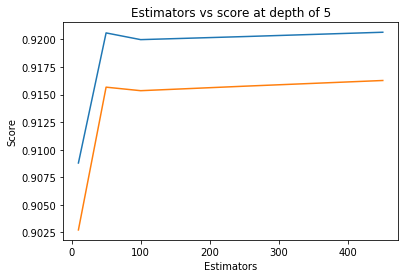

In [47]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8919113579190197 test Score 0.8665537679932261
depth =  9 Train Score 0.9595722056357613 test Score 0.9222473984558576
depth =  11 Train Score 0.9619564663821466 test Score 0.9150404016962382
depth =  15 Train Score 0.9641932788522284 test Score 0.9240344516859114
depth =  20 Train Score 0.9653080337147278 test Score 0.9253087711953109
depth =  35 Train Score 0.9651492005295854 test Score 0.9254187604690117
depth =  50 Train Score 0.9651492005295854 test Score 0.9254187604690117
depth =  70 Train Score 0.9651492005295854 test Score 0.9254187604690117
depth =  130 Train Score 0.9651492005295854 test Score 0.9254187604690117


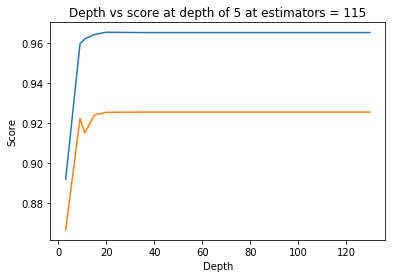

In [48]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [49]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96315524 0.96295853 0.96123878 0.96273008 0.96395942]
mean train scores [0.96436656 0.96389676 0.96207232 0.96373774 0.96554367]


In [50]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [51]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [52]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [53]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9653235081576779
Test f1 score 0.9257709527595297


In [54]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


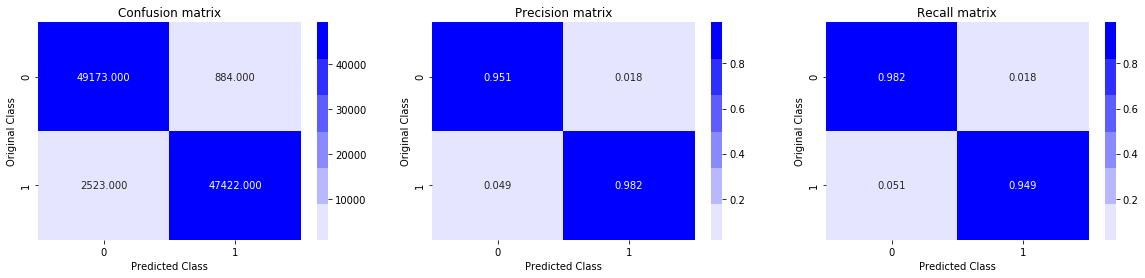

Test confusion_matrix


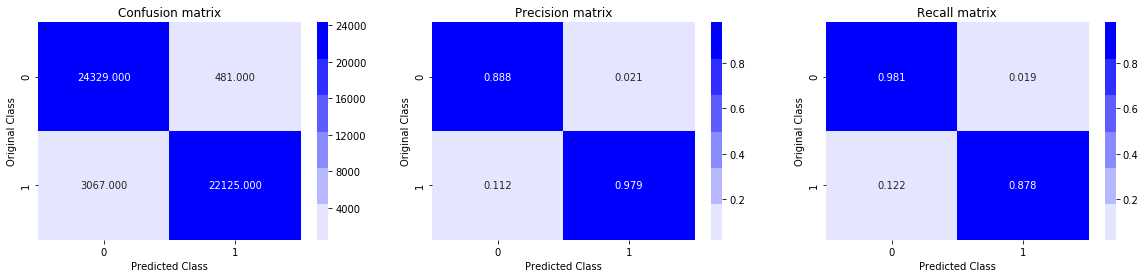

In [55]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

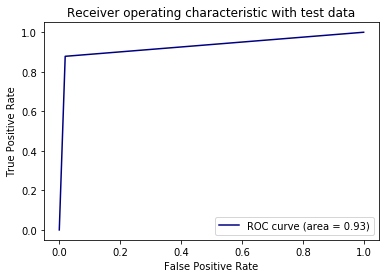

In [56]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

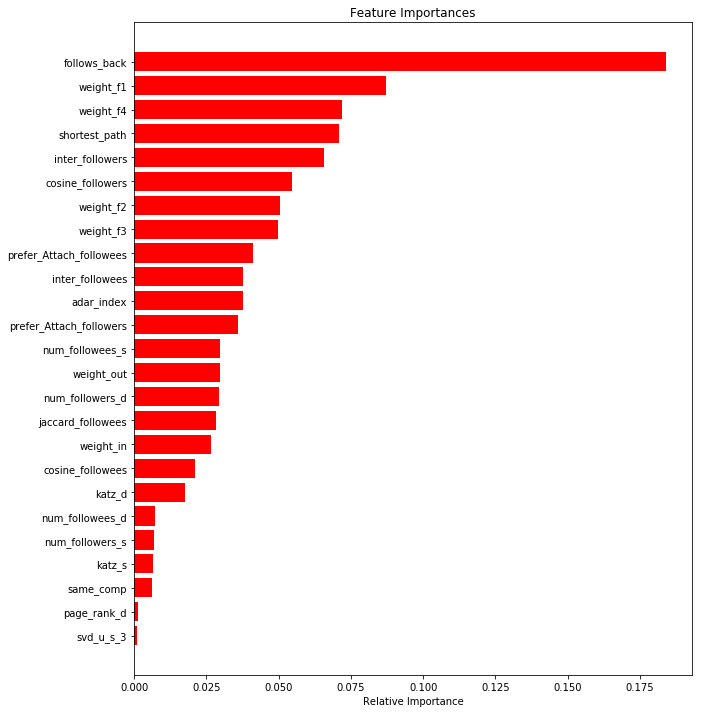

In [57]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGboost

In [58]:
import xgboost as xgb
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }
model = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25)


model.fit(df_final_train,y_train)
print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])

mean test scores [0.9808552  0.9808048  0.98083395 0.98089966 0.9809713 ]
mean train scores [1.         1.         0.99482966 0.99744146 0.99770773]


In [59]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=112,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [67]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=112,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [69]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9952874267742486
Test f1 score 0.9267369218148545


Train confusion_matrix


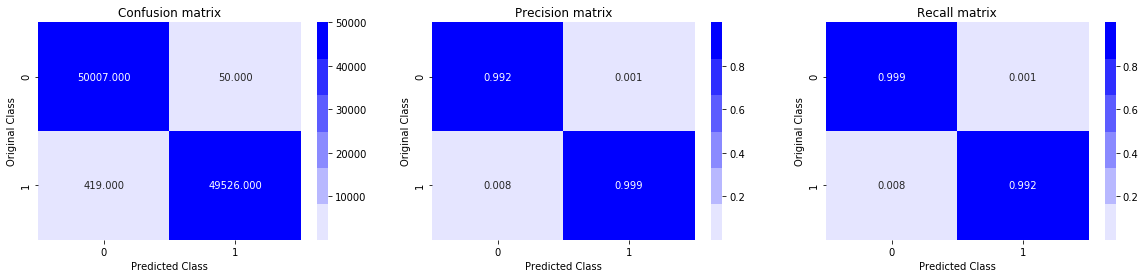

Test confusion_matrix


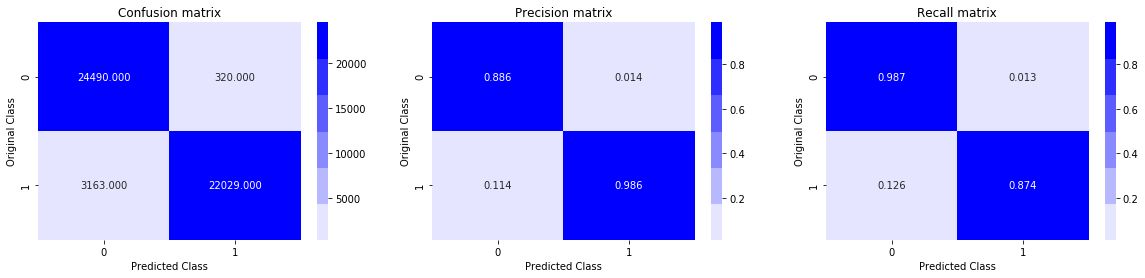

In [70]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

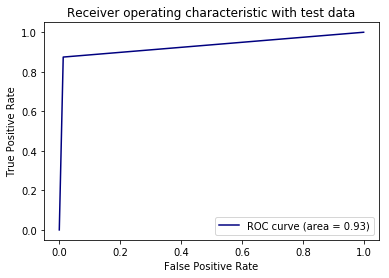

In [71]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

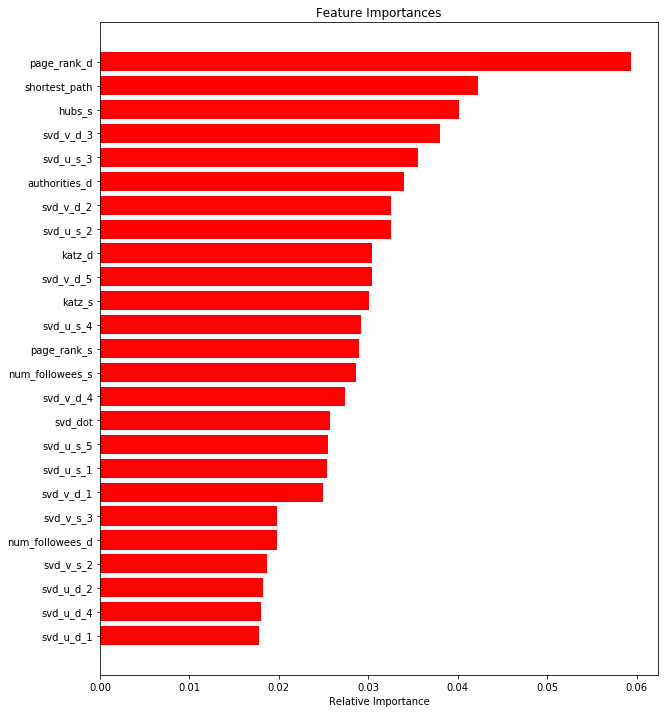

In [72]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

In [76]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest','121','14','0.965','0.925'])
x.add_row(['XGBOOST','112','11','0.995','0.926'])
print(x)

+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |     0.965      |     0.925     |
|    XGBOOST    |     112      |     11    |     0.995      |     0.926     |
+---------------+--------------+-----------+----------------+---------------+


# Thankyou